# Image Preprocessing

In [80]:
import os
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import DirectoryIterator

# Type hint
from typing import Tuple


In [5]:
train_dir = './Lungs_Dataset/train'
val_dir = './Lungs_Dataset/val'
test_dir = './Lungs_Dataset/test'

Configuración de `ImageDataGenerator`: 

- `rotation_range`: especifica el rango de rotaciones aleatorias que se pueden aplicar a las imágenes, en grados. En este caso, las imágenes se pueden rotar hasta 20 grados en cualquier dirección.

- `width_shift_range` y `height_shift_range`: controlan el rango de desplazamientos horizontales y verticales aleatorios que se pueden aplicar a las imágenes. Un valor de 0.1 significa que las imágenes pueden desplazarse horizontal o verticalmente hasta un 10% de la anchura o altura de la imagen.

- `shear_range`: determina el rango de transformaciones de cizallamiento aleatorias que se aplicarán. La cizalladura distorsiona la forma de la imagen desplazando cada fila de píxeles un ángulo determinado. Un valor de 0.1 significa que las imágenes se pueden distorsionar hasta 10 grados.

- `zoom_range`: especifica el rango de zoom aleatorio que se aplicará. El zoom cambia la escala de la imagen. Un valor de 0.1 significa que las imágenes pueden ampliarse o reducirse hasta un 10%.

- `samplewise_center`: cuando se establece en `True`, este parámetro resta la media de cada imagen de cada píxel. Esto centra los valores de los píxeles alrededor de 0.

- `samplewise_std_normalization`: cuando se establece en `True`, este parámetro divide cada píxel por su desviación estándar. Esto normaliza los valores de los píxeles para que tengan media 0 y desviación estándar 1.

Estas técnicas de aumento y preprocesamiento ayudan a introducir variaciones y mejorar la robustez del modelo, es decir, su capacidad de generalización. 



In [3]:
image_generator = ImageDataGenerator(
                    rotation_range=20,
                    width_shift_range=0.1,
                    shear_range=0.1,
                    zoom_range=0.1,
                    samplewise_center=True,
                    samplewise_std_normalization=True)

Una vez configurado el `ImageDataGenerator`, utilizamos su método `flow_from_directory` para crear generadores de imágenes para los conjuntos de train, validation y test. Estos generadores aplicarán los aumentos especificados y preprocesarán las imágenes sobre la marcha durante el entrenamiento y la evaluación del modelo.

In [6]:
train = image_generator.flow_from_directory(train_dir, 
                                            batch_size=8, # 8 images por lote
                                            # Barajar los datos antes de cada epoch durante el entrenamiento,
                                            # asegurando que el modelo ve los datos en un orden diferente en cada epoch.
                                            shuffle=True, 
                                            # Classification task with multiple classes (normal, pneumonia, and COVID-19)
                                            class_mode='categorical',
                                            target_size=(224, 224)) # resize

validation = image_generator.flow_from_directory(val_dir, 
                                                 batch_size=1, # procesamos una imagen cada vez
                                                 shuffle=False, 
                                                 class_mode='categorical',
                                                 target_size=(224, 224))

test = image_generator.flow_from_directory(test_dir, 
                                           batch_size=1, # procesamos una imagen cada vez 
                                           shuffle=False, 
                                           class_mode='categorical',
                                           target_size=(224, 224))

Found 4115 images belonging to 3 classes.
Found 1029 images belonging to 3 classes.
Found 1288 images belonging to 3 classes.


## Preprocessed Image Visualization 

In [31]:
def plot_preprocessed_images(train: DirectoryIterator, num_images_per_class: int) -> None:
    """
    Plots preprocessed images from each class in the training set.

    Args:
        train (DirectoryIterator): The training data iterator.
        num_images_per_class (int): Number of preprocessed images to plot from each class.

    Returns:
        None
    """
    # Initialize counters for each class
    normal_count = 0
    pneumonia_count = 0
    covid_count = 0

    # Plot preprocessed images from each class
    fig, axes = plt.subplots(3, num_images_per_class, figsize=(12, 9))

    for images, labels in train:
        for i in range(len(images)):
            # Get the corresponding class label
            class_label = labels[i]

            # Plot the image based on the class label
            if class_label[0] == 1:
                if covid_count < num_images_per_class:
                    axes[0, covid_count].imshow(images[i])
                    axes[0, covid_count].set_title('COVID-19')
                    axes[0, covid_count].axis('off')
                    covid_count += 1
            elif class_label[1] == 1:
                if normal_count < num_images_per_class:
                    axes[1, normal_count].imshow(images[i])
                    axes[1, normal_count].set_title('NORMAL')
                    axes[1, normal_count].axis('off')
                    normal_count += 1
            elif class_label[2] == 1:
                if pneumonia_count < num_images_per_class:
                    axes[2, pneumonia_count].imshow(images[i])
                    axes[2, pneumonia_count].set_title('PNEUMONIA')
                    axes[2, pneumonia_count].axis('off')
                    pneumonia_count += 1

        if normal_count >= num_images_per_class and pneumonia_count >= num_images_per_class and covid_count >= num_images_per_class:
            break

    plt.tight_layout()
    plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


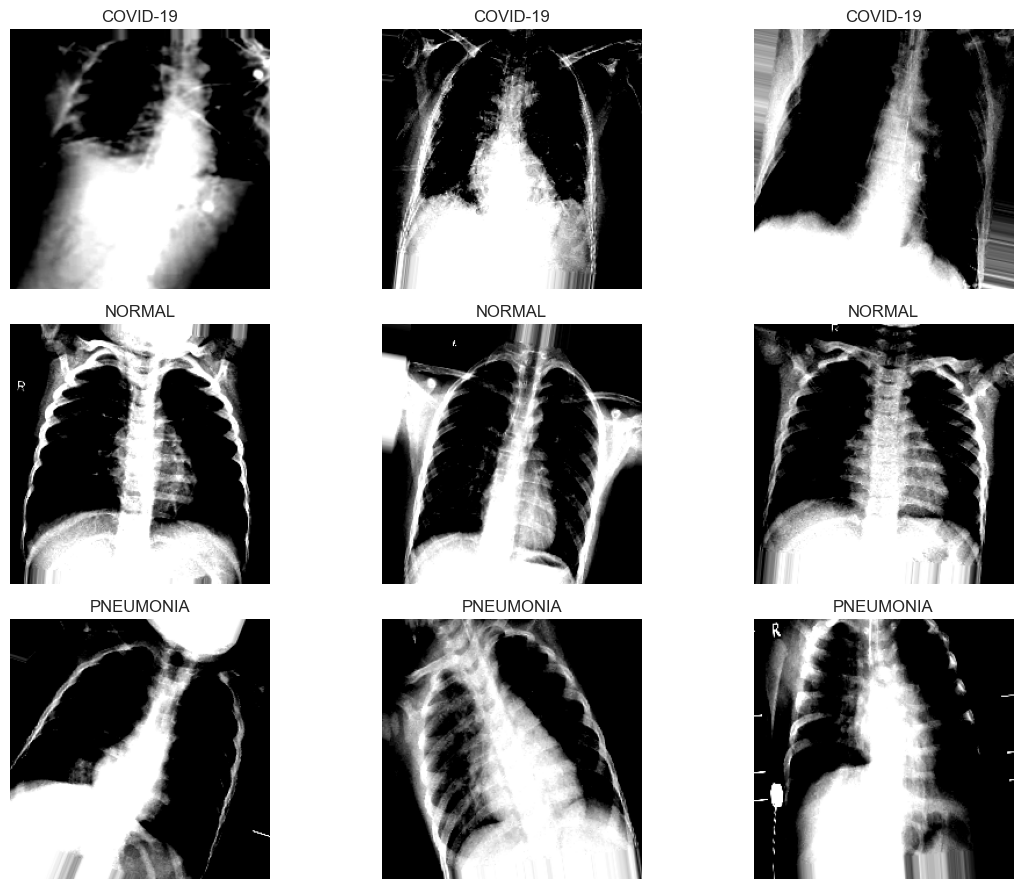

In [35]:
plot_preprocessed_images(train=train, num_images_per_class=3)

In [59]:
def show_image_histogram_info(imagen, etiqueta):
    sns.set_style('white')

    fig, axs = plt.subplots(2, 1, figsize=(8, 10))

    # Muestra la imagen en la primera fila
    axs[0].imshow(imagen, cmap='gray')
    #axs[0].colorbar()
    axs[0].set_title(f"Processed Chest X Ray Image{etiqueta}")
    axs[0].axis('off')

    # Muestra el histograma en la segunda fila
    sns.histplot(imagen.ravel(),
                 label=f"Pixel Mean {np.mean(imagen):.4f} & Standard Deviation {np.std(imagen):.4f}", 
                 kde=False, ax=axs[1])
    axs[1].legend(loc='upper center')
    axs[1].set_title('Distribution of Pixel Intensities in the Image')
    axs[1].set_xlabel('Pixel Intensity')
    axs[1].set_ylabel('# Pixels in Image')

    # Ajusta el espaciado entre las subtramas
    plt.tight_layout()

    # Muestra el subplot
    plt.show()

    print(f"The dimensions of the image are {imagen.shape[0]} pixels width and {imagen.shape[1]} pixels height, one single color channel.")
    print(f"The maximum pixel value is {imagen.max():.4f} and the minimum is {imagen.min():.4f}")
    print(f"The mean value of the pixels is {imagen.mean():.4f} and the standard deviation is {imagen.std():.4f}")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


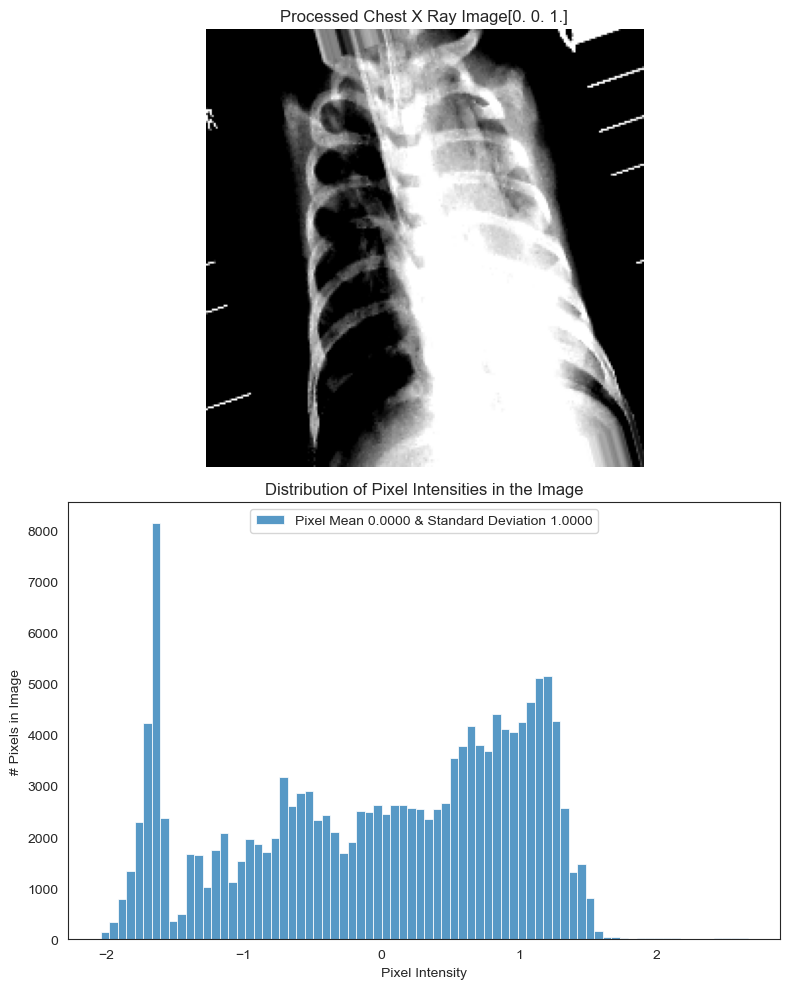

The dimensions of the image are 224 pixels width and 224 pixels height, one single color channel.
The maximum pixel value is 2.6612 and the minimum is -2.0376
The mean value of the pixels is 0.0000 and the standard deviation is 1.0000


In [58]:
generated_image, label = train.__getitem__(0)
imagen = generated_image[0]
etiqueta = label[0]
show_image_histogram_info(imagen, etiqueta)

# Modeling 

- Tenemos desbalanceo de clases: 


In [72]:
print("Train set:\n========================================")
num_covid19_train = len(os.listdir(os.path.join(train_dir, 'COVID19')))
num_normal_train = len(os.listdir(os.path.join(train_dir, 'NORMAL')))
num_pneumonia_train = len(os.listdir(os.path.join(train_dir, 'PNEUMONIA')))

print(f"COVID19={num_covid19_train}")
print(f"NORMAL={num_normal_train}")
print(f"PNEUMONIA={num_pneumonia_train}")


Train set:
COVID19=368
NORMAL=1013
PNEUMONIA=2734


 Calculamos los pesos de clase para datos desequilibrados en un problema de clasificación multi-clase:



In [74]:
total_samples = num_covid19_train + num_normal_train + num_pneumonia_train

weight_for_0 = total_samples / (3 * num_covid19_train)
weight_for_1 = total_samples / (3 * num_normal_train)
weight_for_2 = total_samples / (3 * num_pneumonia_train)

class_weight = {0: weight_for_0, 1: weight_for_1, 2: weight_for_2}

print(f"Weight for class 0 (COVID-19): {weight_for_0:.2f}")
print(f"Weight for class 1 (NORMAL): {weight_for_1:.2f}")
print(f"Weight for class 2 (PNEUMONIA): {weight_for_2:.2f}")

Weight for class 0 (COVID-19): 3.73
Weight for class 1 (NORMAL): 1.35
Weight for class 2 (PNEUMONIA): 0.50


- Estos pesos reflejan el desequilibrio del conjunto de datos, asignando una mayor importancia a la clase COVID-19, una importancia moderada a la clase NORMAL y una menor importancia a la clase PNEUMONIA durante el entrenamiento.

In [75]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [79]:
def build_model(input_shape: Tuple = (224, 224, 3), num_classes: int = 3):

    model = Sequential()
    # Convolutional layers
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    
    # Flatten and dense layers
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))  # Three classes: COVID19, NORMAL, PNEUMONIA
    
    return model

In [81]:
# Create an instance of the model 
model_prep_weighted = build_model()

# Compile the model
model_prep_weighted.compile(optimizer='adam', 
                            loss='categorical_crossentropy', 
                            metrics=['accuracy'])

# Print the model summary
model_prep_weighted.summary()


Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                         

In [82]:
# Train the Model:
history_prep_weighted = model_prep_weighted.fit(train, 
                                                epochs=10, 
                                                batch_size=32, 
                                                validation_data=validation) # validation data to monitor the model's performance


Epoch 1/10


2023-06-05 18:53:52.538059: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


: 

: 